I was looking for random datasets on Kaggle and as a big chocolate fan, I found this one to be of particular interest. I thought it would be neat to do some exploratory data analysis on the world of chocolate bars, so lets get started! 

There are ~1700 professional ratings of chocolate bars from across the globe. Ratings range from 1 (unpleasant) to 5 (elite), and are based on subjective factors such as flavor, texture, aftermelt, and overall opinion. Ratings can only be in intervals of 0.25. These ratings were compiled by Brady Brelinski, Founding Member of the Manhattan Chocolate Society. His website can be found at http://www.flavorsofcacao.com

First, we need to import pandas, matplotlib, and seaborn. 


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set(font_scale=1)

Then, import our dataset. 

In [3]:
df = pd.read_csv('flavors_of_cacao.csv')

Lets display the first few rows of the dataset to get a feel for what we're 
working with.

In [4]:
df.head()


,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876,2016,63%,France,3.75,,Sao Tome
1,A. Morin,Kpime,1676,2015,70%,France,2.75,,Togo
2,A. Morin,Atsane,1676,2015,70%,France,3.00,,Togo
3,A. Morin,Akata,1680,2015,70%,France,3.50,,Togo
4,A. Morin,Quilla,1704,2015,70%,France,3.50,,Peru


There are 9 columns, and in the first few rows we can see there is some null elements for bean type. Is there missing data in other columns? 

In [5]:
df.isnull().any()

Company \n(Maker-if known)           False
Specific Bean Origin\nor Bar Name    False
REF                                  False
Review\nDate                         False
Cocoa\nPercent                       False
Company\nLocation                    False
Rating                               False
Bean\nType                            True
Broad Bean\nOrigin                    True
dtype: bool

So there is missing data in the bean type and broad bean origin columns. The bean type column will be impossible to work with because most of the rows are missing the bean type. Broad bean origin is missing in a bunch of rows as well. We'll see once we get to our analysis. 

The 9 columns have long names, so I want to rename them so it is easier to type out in the future. 

In [6]:
df.columns = ['company','origin','ref','review_date','cocoa_percent','company_location','rating','bean_type','broad_bean_origin']

What does the distribution of ratings look like?

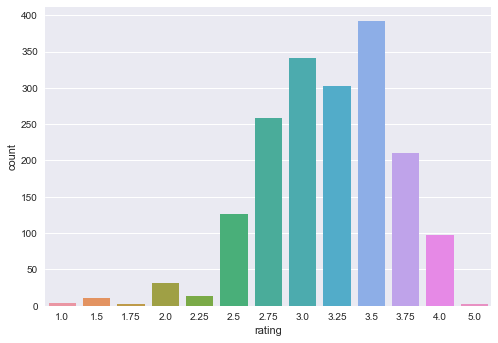

In [7]:
ax = sns.countplot(x='rating',data=df)
plt.show()

In [8]:
df['rating'].describe()

count    1795.000000
mean        3.185933
std         0.478062
min         1.000000
25%         2.875000
50%         3.250000
75%         3.500000
max         5.000000
Name: rating, dtype: float64

The distribution is left-skewed because the mean < median and it shows quite clearly on the count plot. This means that people are more likely to give out lower ratings than higher ratings. I like to use the median in this case because the ratings are discrete, NOT continuous. Median is nice because it is a robust estimator and for discrete values, it gives an answer that is comparable to the actual ratings given. 

Lets see what companies are the best at making chocolate bars. But before that, one issue is that some brands may have hundreds of reviews while others have one. If a company has one review and its 5 stars, that brand's rating is almost certainly skewed too high. Lets get a count of each and see what the distribution looks like. 

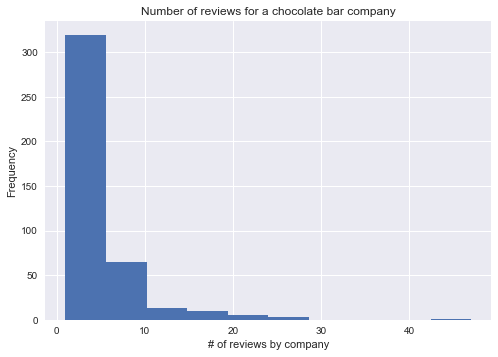

In [9]:
ax = df.groupby(['company']).size().sort_values().plot.hist()
ax.set_xlabel('# of reviews by company')
ax.set_title('Number of reviews for a chocolate bar company')
plt.show()

We see a heavily right-skewed distribution, meaning that the vast majority of the number of reviews is on the low side. For simplicity, lets say that a company must have at least 10 reviews to be considered. 

In [10]:
sufficient_ratings = df.groupby(['company']).filter(lambda x: len(x) >= 10)

Now we have a new dataset with ratings in which there are more than 10 ratings for the specific company. Lets get the median rating for each of these companies, and plot it. 

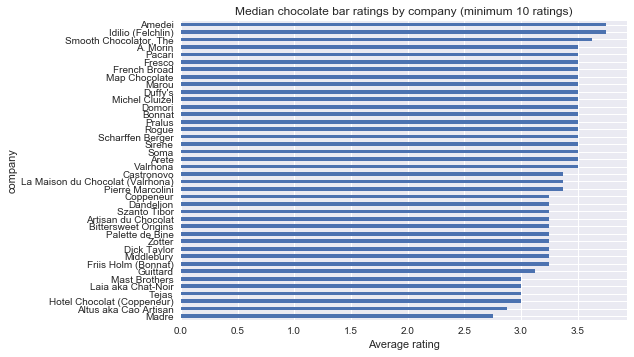

In [11]:
ax = sufficient_ratings.groupby(['company'])['rating'].median().sort_values().plot.barh()
ax.set_xlabel('Average rating')
ax.set_title('Median chocolate bar ratings by company (minimum 10 ratings)')
plt.show()

Among companies with 10 or more ratings, Amedei and Idilio (Felchlin) tops the list with a median rating of 3.75. Amedei is an italian-based chocolate company with just 33 employees. Idilio (Felchlin) are both swiss-based chocolate companie. Madre takes home the trophy for worst chocolate bars with a median rating of 2.75. Madre is US (Hawaii)-based. 

Now lets see if the quality of chocolate is based on the bean country of origin. First lets see how many countries of origins there are. 

In [12]:
df.groupby(['broad_bean_origin']).size().sort_values()

broad_bean_origin
Africa, Carribean, C. Am.          1
Ghana, Panama, Ecuador             1
Gre., PNG, Haw., Haiti, Mad        1
Guat., D.R., Peru, Mad., PNG       1
Mad., Java, PNG                    1
Ven., Trinidad, Mad.               1
Madagascar & Ecuador               1
Martinique                         1
Ven., Indonesia, Ecuad.            1
Nigeria                            1
PNG, Vanuatu, Mad                  1
Ven, Trinidad, Ecuador             1
Ven, Bolivia, D.R.                 1
Peru(SMartin,Pangoa,nacional)      1
Peru, Belize                       1
Peru, Dom. Rep                     1
Peru, Ecuador                      1
Peru, Ecuador, Venezuela           1
Peru, Mad., Dom. Rep.              1
Peru, Madagascar                   1
Principe                           1
South America, Africa              1
Suriname                           1
Trinidad, Ecuador                  1
Ghana & Madagascar                 1
Ven.,Ecu.,Peru,Nic.                1
Indonesia, Ghana    

There are 73 chocolate bars that have unknown bean origins. Is there a way we can find out where they are from? Lets display the bars without a broad bean origin. 

In [13]:
df[df['broad_bean_origin']=='\xa0'].head()

,company,origin,ref,review_date,cocoa_percent,company_location,rating,bean_type,broad_bean_origin
77,Amedei,Nine,111,2007,75%,Italy,4.00,Blend,
85,Amedei,Toscano Black,170,2007,63%,Italy,3.50,Blend,
86,Amedei,Toscano Black,40,2006,70%,Italy,5.00,Blend,
87,Amedei,Toscano Black,75,2006,66%,Italy,4.00,Blend,
144,Bahen & Co.,Houseblend,1474,2015,80%,Australia,3.25,,


So we see that some of the bars in the origin column have the bar name, while others have the specific city name. It would be too tedious to go through each one and find out where they are sourced, so lets group by bean origin then ultimately exclude these bars.

Another issue we have is some of the countries are represented very little, and others have multiple countries listed which complicates things a whole lot more. Lets take a look at the distribution of countries represented by the beans. 

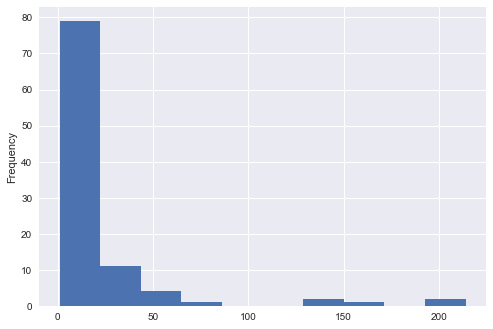

In [14]:
ax = df.groupby(['broad_bean_origin']).size().sort_values().plot.hist()
plt.show()

Once again, the graph is heavily right-skewed. Like before, lets set a hard limit of 10 to avoid unfairly displaying under-represented countries. 

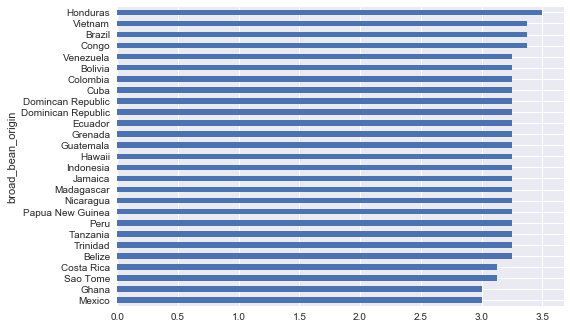

In [15]:
ax = df[df['broad_bean_origin']!='\xa0'].groupby(['broad_bean_origin']).filter(lambda x: x is not '\xa0' and len(x) >= 10).groupby(['broad_bean_origin'])['rating'].median().sort_values().plot.barh()
plt.show()

Bars made with cocoa beans from Honduras take the top slot with a median rating of 3.5. 

Perhaps it is not the bean origin, but rather the location of the company. It's entirely possible that different countries have different methods and techniques for making their bars which causes a different in quality/taste.

Lets show the distribution of countries represented by the company origins. 


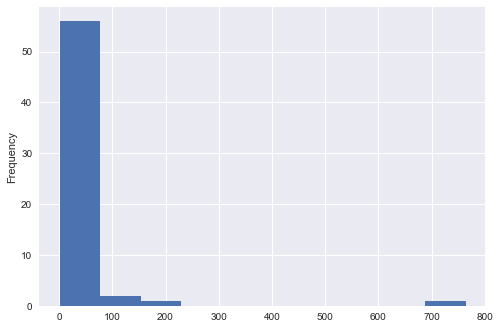

In [16]:
ax = df.groupby(['company_location']).size().plot.hist()
plt.show()

Most are on the low side, and the median is 5.5 ratings per country. Once again, lets set a hard limit of 10, and show which countries are the best at making chocolate bars!

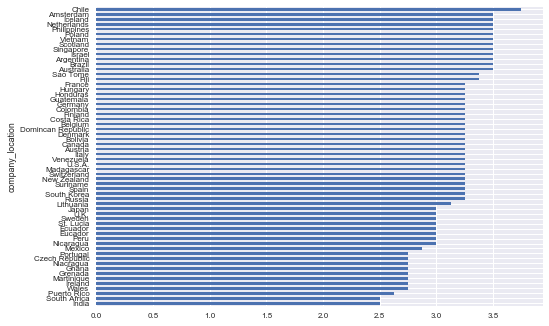

In [17]:
sns.set(font_scale=0.8)
ax = df.groupby(['company_location'])['rating'].median().sort_values().plot.barh()
plt.show()

Moral of the story: buy your chocolate bars from Chilean companies, but avoid South African and Indian companies. 

Next, it would be interesting to see the correlations between the different variables. Specifically, does the amount of cocoa (or lack thereof) improve the taste of the chocolate? First we need to convert the cocoa_percent column into floats, then we can use a scatter plot to see the relationship.

In [18]:
df['cocoa_percent'] = df['cocoa_percent'].str.strip('%').astype('float')

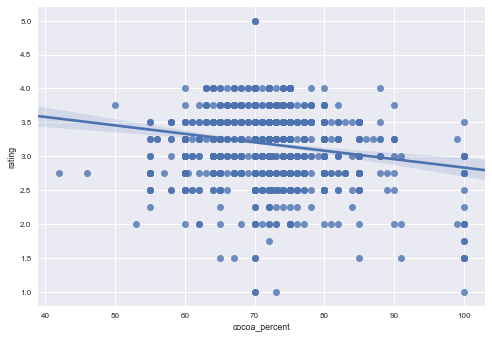

In [19]:
sns.regplot(x='cocoa_percent',y='rating',data=df)
plt.show()

It is quite obvious from looking at the scatter plot that there is virtually no relationship between the amount of cocoa in the bar and the quality of the chocolate bar. 

Conclusion:

Chileans are great at making chocolate. 

Honduras produces the best cocoa beans. 

Amedei and Idilio (Felchlin) are two companies that make the best chocolate bars. 

The amount of cocoa solids present in the chocolate has no effect on the quality of the chocolate bar. 